# Regression & Predictive Modeling (Bootcamp Lesson)


## Agenda
1. **Conceptual Foundations**
   - What is regression?
   - Linear regression equation
   - Assumptions of regression

2. **Hands-On Coding**
   - Build a simple regression model
   - Evaluate with metrics (R², MAE, RMSE)
   - Visualize predictions

3. **Diagnostics & Assumptions**
   - Residual plots
   - Normality checks
   - Multicollinearity

4. **Practice & Wrap-Up**
   - Exercises
   - Quiz & discussion
   - Key takeaways


## 1. Conceptual Foundations

Linear regression models the relationship between a dependent variable (target) and one or more independent variables (features).

Equation:


$y = \beta_0 + \beta_1 x + \epsilon$



**Assumptions:**
1. Linearity  
2. Independence  
3. Homoscedasticity  
4. Normality of errors  
5. No multicollinearity

# Assumptions of Linear Regression

## Linearity
- The relationship between predictors (independent variables) and the target (dependent variable) is linear.
- Example: As advertising spend increases, sales increase in a straight-line fashion.

---

## Independence
- Observations are independent of each other.
- No hidden relationships between data points (e.g., repeated measures on the same subject without accounting for it).

---

## Homoscedasticity
- The variance of residuals (errors) is constant across all levels of the independent variables.
- Residuals should not "fan out" or "narrow" as predictions change.

---

## Normality of Errors
- Residuals (differences between actual and predicted values) should follow a normal distribution.
- Important for hypothesis testing and confidence intervals.

---

## No Multicollinearity
- Predictors should not be highly correlated with each other.
- High correlation between features makes it difficult to isolate their individual effects on the target.



In [3]:
# Example 1: Linear relationship
x1 = list(range(1, 20))
y = [3*x + 2 for x in x1]

plt.scatter(x1, y)
plt.title('Linear Relationship')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

NameError: name 'plt' is not defined

In [ ]:
# Create DataFrame
df = pd.DataFrame({'years_of_experience': x1,
                   'salary': y})
df

NameError: name 'pd' is not defined

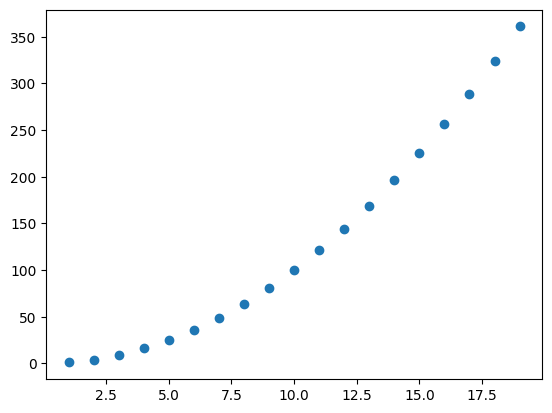

In [ ]:
x1 = list(range(1, 20))
y = [x ** 2 for x in x1]

plt.scatter(x1, y)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Synthetic dataset
np.random.seed(42)
X = np.random.rand(1000, 1) * 10
y = 2.5 * X.flatten() + 5 + np.random.randn(1000) * 2

In [ ]:
df = pd.DataFrame({'x': X.flatten(), 'y': y})
df.shape

(1000, 2)

In [ ]:
random_outliers = df.sample(10)
random_outliers

,x,y
752,6.277081,21.339037
360,3.881699,14.109121
595,4.739616,16.430394
505,1.626169,6.402958
371,0.182218,1.148765
163,5.357747,18.196015
128,0.069521,6.464772
843,9.610703,27.690470
183,8.773394,28.351491
358,9.402302,29.700556


In [ ]:
df.loc[random_outliers.index, 'y'] = df.loc[random_outliers.index, 'y'] * 10

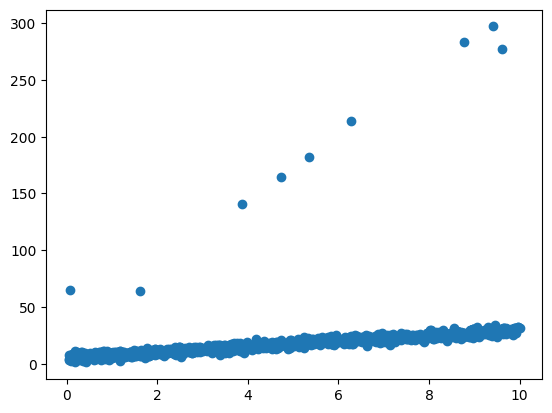

In [ ]:
plt.scatter(df['x'], df['y'])

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df[['x']], df['y'], test_size=0.2, random_state=42)

# make instance of linear regression
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

# predictions
y_pred = lr.predict(X_test)

# R2
model_r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {np.round(model_r2, 2)}')

# MAE
model_mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {np.round(model_mae, 2)}')

# MSE
model_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {np.round(model_mse, 2)}')

R2 Score: 0.3
MAE: 2.95
MSE: 113.72


In [ ]:
# Training R2
model_r2_training = r2_score(y_train, lr.predict(X_train))
print(f'R2 Training Score: {np.round(model_r2_training, 2)}')

# Training MAE
model_mae_training = mean_absolute_error(y_train, lr.predict(X_train))
print(f'Training MAE: {np.round(model_mae_training, 2)}')

# Traing MSE
model_mse_training = mean_squared_error(y_train, lr.predict(X_train))
print(f'Training MSE: {np.round(model_mse_training, 2)}')

R2 Training Score: 0.17
Training MAE: 4.05
Training MSE: 356.18


In [ ]:
df.columns = ['Dog Height (in)', 'Dog Weight (lbs)']
df.head()

,Dog Height (in),Dog Weight (lbs)
0,3.745401,14.718905
1,9.507143,26.097169
2,7.319939,24.060244
3,5.986585,21.187634
4,1.560186,10.020047


In [ ]:
# Intercept
print(f'Intercept: {np.round(lr.intercept_, 2)}')

# Coefficient
print(f'Coefficient: {np.round(lr.coef_[0], 2)}')

Intercept: 4.9
Coefficient: 2.91


In [ ]:
new_dog = pd.DataFrame({'x': [21]})
lr.predict(new_dog)

array([57.14091688])

In [ ]:
new_dog = pd.DataFrame({'x': [22]})
lr.predict(new_dog)

array([59.60573604])

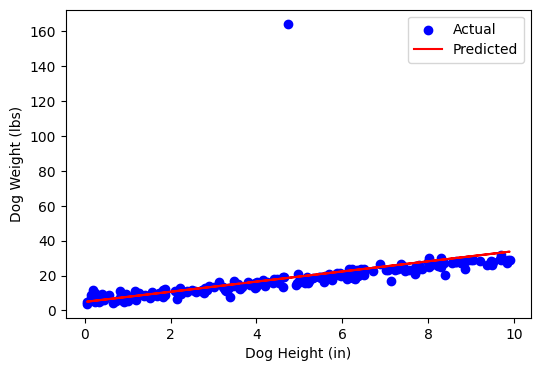

In [ ]:
# visualization
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Dog Height (in)')
plt.ylabel('Dog Weight (lbs)')
plt.legend();

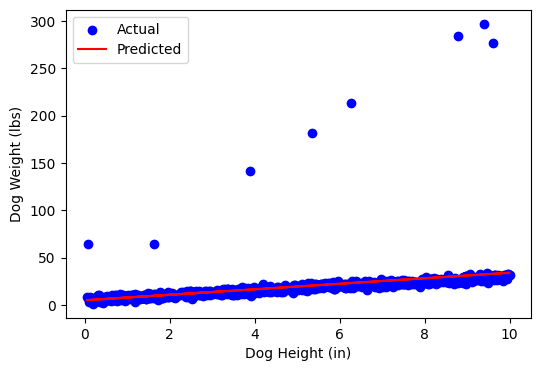

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, lr.predict(X_train), color='red', label='Predicted')
plt.xlabel('Dog Height (in)')
plt.ylabel('Dog Weight (lbs)')
plt.legend();

# Model Evaluation Metrics

## R² (Coefficient of Determination)
- Measures how well the regression model explains the variance in the data.
- Range: 0 to 1 (higher is better).
- Example: R² = 0.85 → 85% of the variance in the target is explained by the model.

---

## MAE (Mean Absolute Error)
- Average of the absolute differences between predicted and actual values.
- Easy to interpret: "On average, predictions are off by X units."
- Less sensitive to large errors compared to MSE.

---

## MSE (Mean Squared Error)
- Average of the squared differences between predicted and actual values.
- Penalizes larger errors more heavily (because of squaring).
- Useful when large errors are especially undesirable.

---

## Summary
- **R²** → How much variance is explained.  
- **MAE** → Average size of errors (absolute).  
- **MSE** → Average squared error, emphasizes large mistakes.  


## Diagnostics & Assumptions

### Residual Analysis
Residuals = Actual - Predicted

- Plot residuals vs. fitted values → check homoscedasticity
- Histogram or Q-Q plot of residuals → check normality


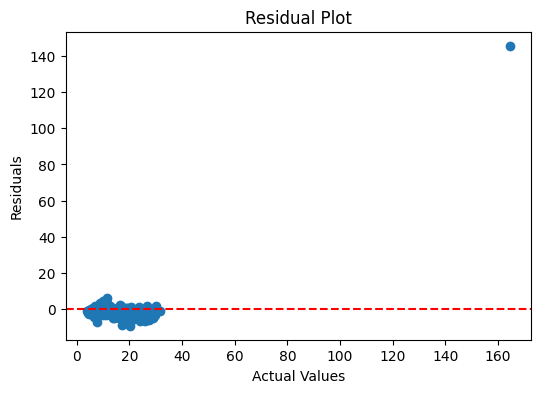

In [ ]:
# residuals
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

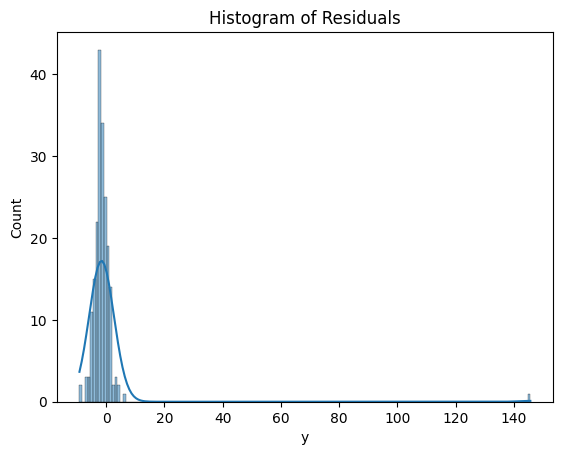

In [ ]:
# normality of errors

sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals');

In [ ]:
# advertising
advertising = pd.read_csv('https://raw.githubusercontent.com/19karim/Advertising_Dataset_Linear_Regression/refs/heads/main/Advertising.csv', index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# Fit on TV to predict sales

X_train, X_test, y_train, y_test = train_test_split(advertising[['TV']], advertising['sales'],
                                                    test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
# make y preds
y_pred = lr.predict(X_test)

# calculate evaluation metrics
model_r2 = round(r2_score(y_test, y_pred),2)
model_mae = round(mean_absolute_error(y_test, y_pred),2)
model_mse = round(mean_squared_error(y_test, y_pred),2)
print(f"R-squared: {model_r2}")
print(f"MAE: {model_mae}")
print(f"MSE: {model_mse}")

(160, 1) (40, 1) (160,) (40,)
R-squared: 0.68
MAE: 2.44
MSE: 10.2


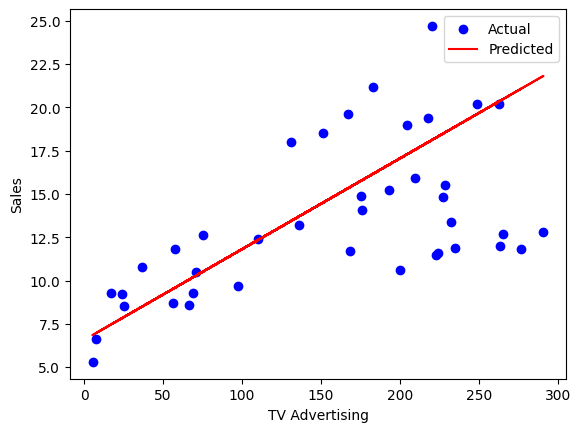

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.legend();

Text(0, 0.5, 'Residuals')

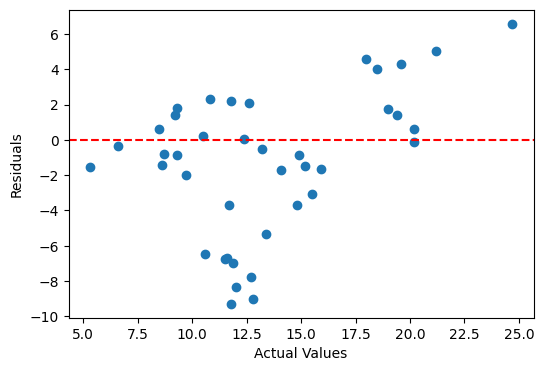

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

<Axes: xlabel='sales', ylabel='Count'>

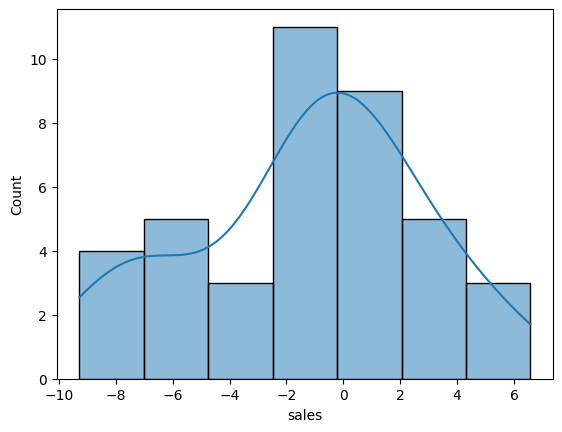

In [ ]:
sns.histplot(residuals, kde=True)

In [ ]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
lr.coef_[0] * 1000

np.float64(52.45828085802821)

<Axes: >

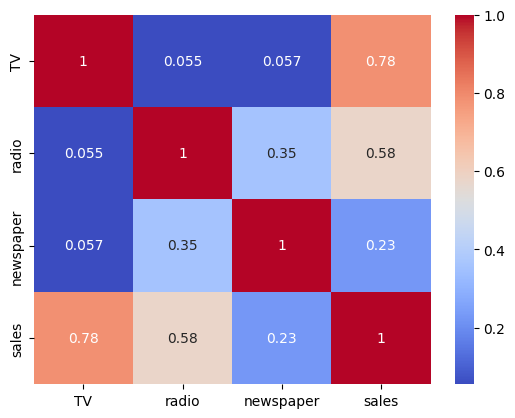

In [ ]:
# multiple linear regression

sns.heatmap(advertising.corr(), annot=True, cmap='coolwarm')

In [ ]:
# fit on TV and Radio to predict sales
X = advertising[['TV', 'radio']]
y = advertising['sales']

# make train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_test)

# calculate metrics
model_r2 = round(r2_score(y_test, y_pred),2)
model_mae = round(mean_absolute_error(y_test, y_pred),2)
model_mse = round(mean_squared_error(y_test, y_pred),2)

print(f"R-squared: {model_r2}")
print(f"MAE: {model_mae}")
print(f"MSE: {model_mse}")

R-squared: 0.9
MAE: 1.44
MSE: 3.14


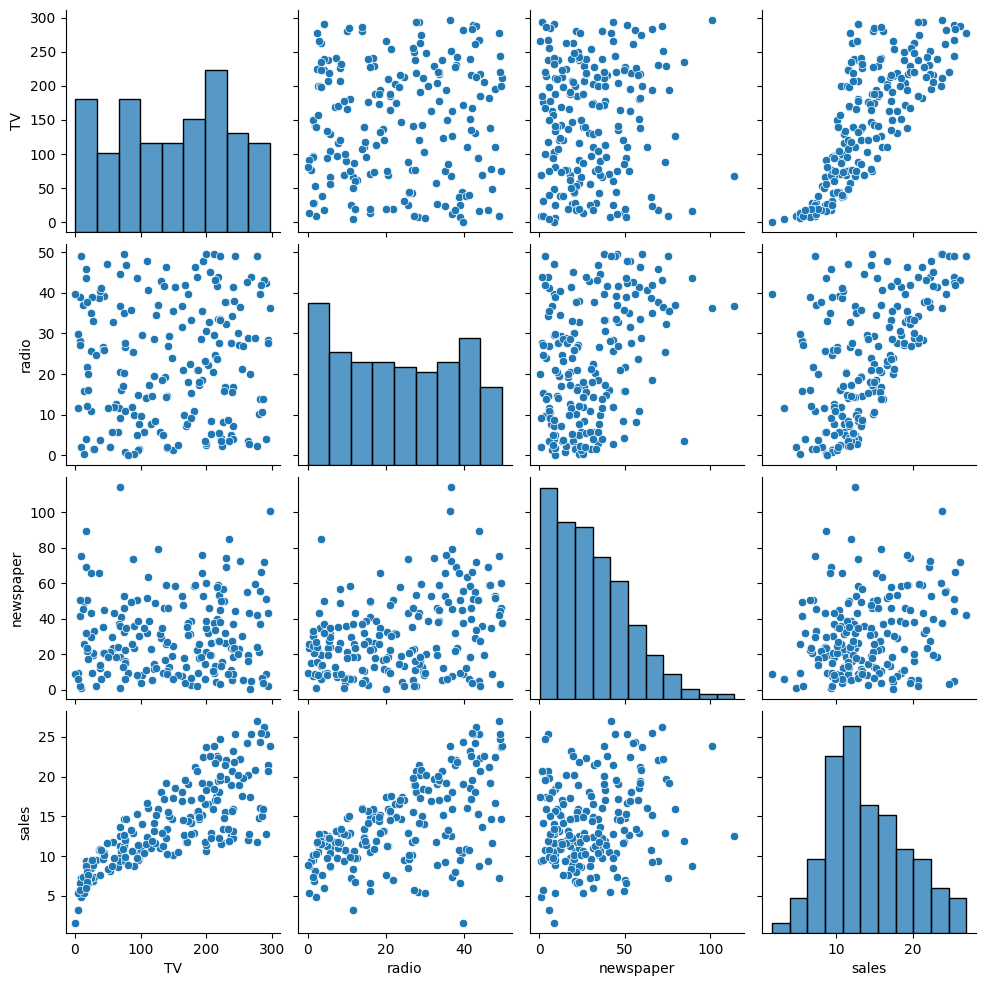

In [ ]:
sns.pairplot(advertising)

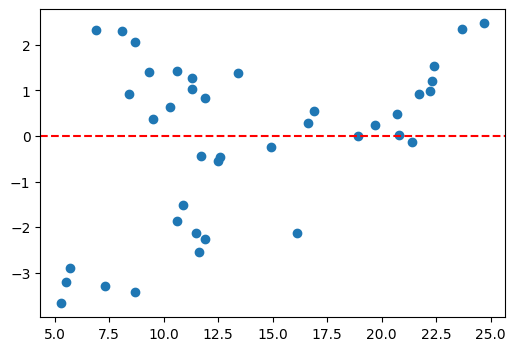

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')

<Axes: xlabel='sales', ylabel='Count'>

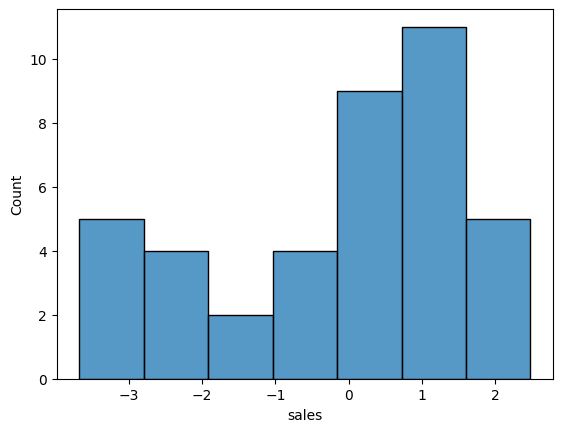

In [ ]:
sns.histplot(residuals)

In [ ]:
df = pd.read_csv('/content/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<Axes: >

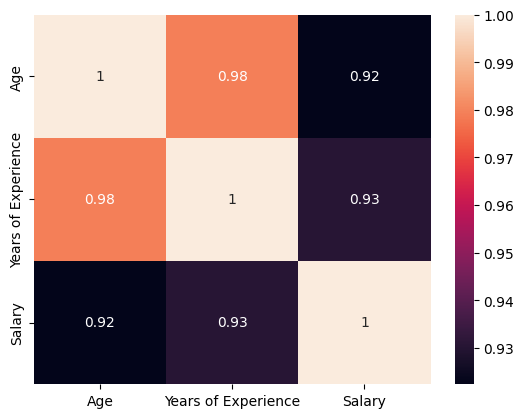

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

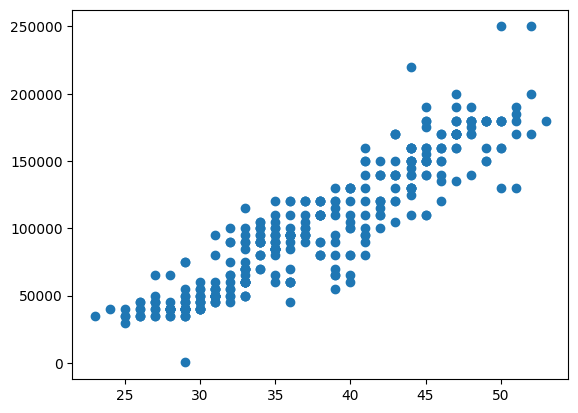

In [ ]:
plt.scatter(df['Age'], df['Salary'])

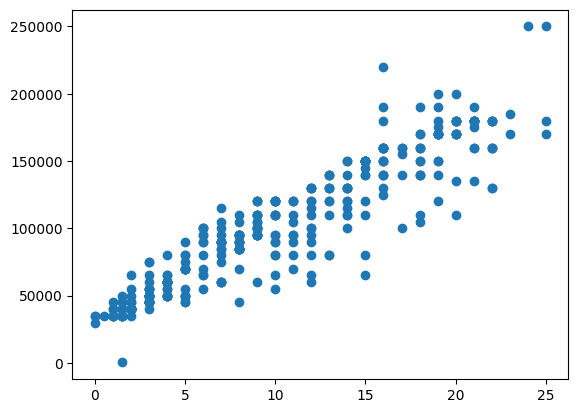

In [ ]:
plt.scatter(df['Years of Experience'], df['Salary'])

<Axes: >

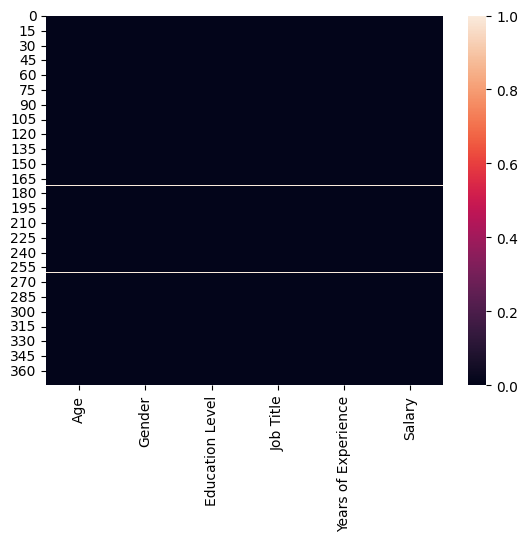

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df[df['Age'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


Text(0, 0.5, 'Salary')

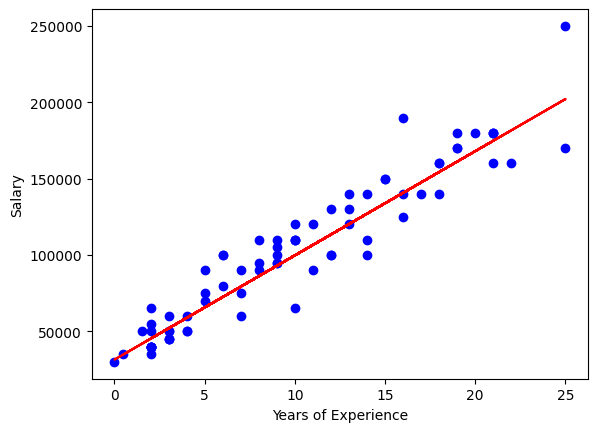

In [ ]:
X = df[['Years of Experience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# fit regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [ ]:
model_r2 = round(r2_score(y_test, y_pred),2)
model_mae = round(mean_absolute_error(y_test, y_pred),2)
model_mse = round(mean_squared_error(y_test, y_pred),2)

print(model_r2)
print(model_mae)
print(model_mse)

0.9
12094.17
241834883.9


In [ ]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's,224
Master's,98
PhD,51


In [ ]:
# Years of Experience and Education Level

X = df[['Years of Experience', 'Education Level']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# fit regression
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: could not convert string to float: "Bachelor's"

In [ ]:
df_ed_dummy = pd.get_dummies(df, columns=['Education Level'],
                             drop_first=True)

X = df_ed_dummy[['Years of Experience', "Education Level_Master's",
                 'Education Level_PhD']]
y = df_ed_dummy['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# fit regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

model_r2 = round(r2_score(y_test, y_pred),2)
model_mae = round(mean_absolute_error(y_test, y_pred),2)
model_mse = round(mean_squared_error(y_test, y_pred),2)

print(model_r2, model_mae, model_mse)

0.9 10699.55 233165175.58


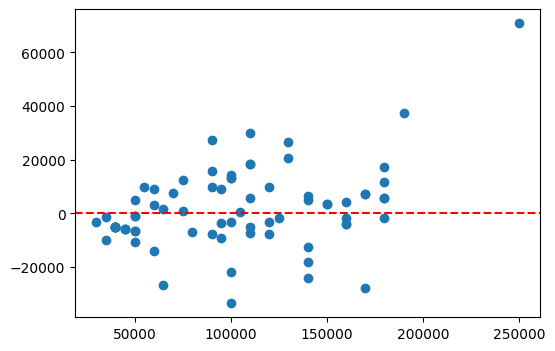

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')

<Axes: xlabel='Salary', ylabel='Count'>

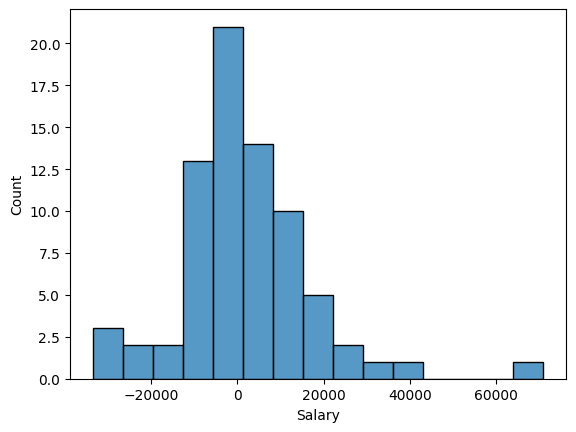

In [ ]:
sns.histplot(residuals)

<Axes: xlabel='Salary', ylabel='Count'>

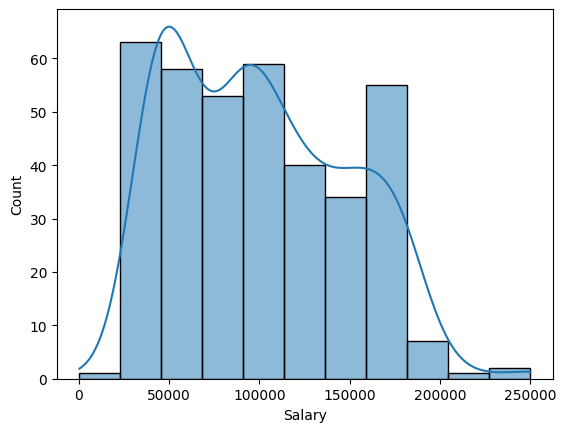

In [ ]:
sns.histplot(df['Salary'], kde=True)

In [ ]:
lr.coef_, lr.intercept_

(array([ 5830.73404468, 18482.37384066, 25760.97032294]),
 np.float64(33344.17966720737))

In [ ]:
X_train.columns

Index(['Years of Experience', 'Education Level_Master's',
       'Education Level_PhD'],
      dtype='object')

In [ ]:
# dummy code the top most common job titles
# everything else will be mput in an other category

most_common_job_titles = df['Job Title'].value_counts().head(20).index

df['job_title_top10'] = np.where(df['Job Title'].isin(most_common_job_titles),
                                 df['Job Title'], 'Other')

In [ ]:
df[['job_title_top10', 'Years of Experience', 'Salary']]

,job_title_top10,Years of Experience,Salary
0,Other,5.0,90000.0
1,Other,3.0,65000.0
2,Other,15.0,150000.0
3,Other,7.0,60000.0
4,Other,20.0,200000.0
...,...,...,...
370,Senior Marketing Analyst,8.0,85000.0
371,Director of Operations,19.0,170000.0
372,Junior Project Manager,2.0,40000.0
373,Other,7.0,90000.0


In [ ]:
df_ed_job_title = pd.get_dummies(
    df[['job_title_top10', 'Years of Experience', 'Salary']],
    columns=['job_title_top10'],
    drop_first=True)

In [ ]:
df_ed_job_title.head(2)

,Years of Experience,Salary,job_title_top10_Director of Operations,job_title_top10_Junior Business Analyst,job_title_top10_Junior Business Development Associate,job_title_top10_Junior Financial Analyst,job_title_top10_Junior Marketing Coordinator,job_title_top10_Junior Operations Analyst,job_title_top10_Junior Project Manager,job_title_top10_Other,...,job_title_top10_Senior Financial Analyst,job_title_top10_Senior Financial Manager,job_title_top10_Senior Marketing Analyst,job_title_top10_Senior Marketing Manager,job_title_top10_Senior Operations Manager,job_title_top10_Senior Product Designer,job_title_top10_Senior Product Manager,job_title_top10_Senior Project Coordinator,job_title_top10_Senior Project Manager,job_title_top10_Senior Software Engineer
0,5.0,90000.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,3.0,65000.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df_ed_job_title.drop(columns='Salary')
y = df_ed_job_title['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# fit regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

model_r2 = round(r2_score(y_test, y_pred),2)
model_mae = round(mean_absolute_error(y_test, y_pred),2)
model_mse = round(mean_squared_error(y_test, y_pred),2)

print(model_r2, model_mae, model_mse)

0.9 11535.8 242009775.56
